## Linear Regression Analysis of Covid 19 data for Canada, Italy, India, and the United States
#### By: Ian

### Import needed Libraries

In [678]:
##Import Key Libraries for use
import datetime as dt
import math
import dateutil
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score, mean_squared_error
from pandas.tseries.offsets import DateOffset

### Import and Scrub Data from Github

In [679]:
neededColumns = ["date","location","total_cases_per_million","new_cases_per_million","total_deaths_per_million","human_development_index","median_age","population"]
#Import CSV
covid19Dataframe = pd.read_csv("https://raw.githubusercontent.com/WhipSnake23/Python-Class-Project/main/Data/owid-covid-data.csv")
#Remove Smoothed Columns from dataframe
covid19Dataframe = covid19Dataframe[covid19Dataframe.iso_code.str.contains("CAN")| (covid19Dataframe.iso_code.str.contains("IND")) | (covid19Dataframe.iso_code.str.contains("ITA")) | (covid19Dataframe.iso_code.str.contains("USA"))]
covid19Dataframe = covid19Dataframe[neededColumns]
covid19Dataframe.dropna(subset=['new_cases_per_million'],inplace=True)
covid19Dataframe.dropna(subset=['total_deaths_per_million'],inplace=True)
covid19Dataframe['date'] = pd.to_datetime(covid19Dataframe['date'])
#Reset Index
covid19Dataframe.reset_index(drop=True, inplace=True)



#Import Comparison Data set containing data from March. The data set we are using stops in February
MarchCovidData = pd.read_csv("https://raw.githubusercontent.com/WhipSnake23/Python-Class-Project/main/Data/Covid-IND_CAN-USA_ITA-March.csv")
MarchCovidData = MarchCovidData[neededColumns]
MarchCovidData.dropna(subset=['new_cases_per_million'],inplace=True)
MarchCovidData.dropna(subset=['total_deaths_per_million'],inplace=True)
MarchCovidData['date'] = pd.to_datetime(MarchCovidData['date'])
#Reset Index
MarchCovidData.reset_index(drop=True, inplace=True)


### Define Notebook Functions

In [680]:
#These functions make it easier to test configuration changes and features easier

#Prints the Scores from the run of the algorithum against the data
def printMetrics(test, predictions):
    print(f"Score: {explained_variance_score(test, predictions):.2f}")
    print(f"MAE: {mean_absolute_error(test, predictions):.2f}")
    print(f"RMSE: {math.sqrt(mean_squared_error(test, predictions)):.2f}")
    print(f"r2: {r2_score(test, predictions):.2f}")

#Function to run the algorithum and call metric function
# def RunModel(f_Features,f_Target,f_execution,f_dataframe="NAN"):
#     x_train, x_test, y_train, y_test = train_test_split(f_Features, f_Target, test_size=0.25, random_state=1)
#     model = ElasticNet(random_state=1)
#     model.fit(x_train, y_train)
#     if f_execution == "score":
#         predictions = model.predict(x_test)
#         printMetrics(y_test, predictions)
#     elif f_execution == "predict":
#         predictions = model.predict(f_dataframe)
#         printMetrics(y_test, predictions)
#     return predictions

In [681]:
targetColumn = "total_cases_per_million"

In [682]:
featureColumns = ["new_cases_per_million","total_deaths_per_million","human_development_index","median_age","population"]
#featureColumns = ["total_deaths_per_million","new_cases_per_million","human_development_index","gdp_per_capita","median_age","population_density","population"]
features=covid19Dataframe[featureColumns]
target=covid19Dataframe[targetColumn]

#RunModel(features,target,"score")
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=1)
model = ElasticNet(random_state=1,max_iter=10000)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
printMetrics(y_test, predictions)


Score: 0.92
MAE: 3185.80
RMSE: 4726.74
r2: 0.92


In [683]:
#Prediction Methods
# predictionDataFrame = canadaMarchCovidData[featureColumns]
# predictedValues = model.predict(predictionDataFrame)
# printMetrics(y_test, predictions)
# #predictedValues = RunModel(features,target,"predict",predictionDataFrame)
# predictedValues = np.around(predictedValues,decimals=1)
# #predictedValues
# predictedValuesFrame = predictionDataFrame.copy()
# predictedValuesFrame['total_cases_per_million'] = predictedValues
#
# columnToCompare = ['total_cases_per_million']
# actual_total_cases_per_million = canadaMarchCovidData[columnToCompare]
# predicted_actual_total_cases_per_million = predictedValuesFrame[columnToCompare]
# comparedDataFrame = actual_total_cases_per_million.compare(predicted_actual_total_cases_per_million)
# comparedDataFrame = comparedDataFrame["total_cases_per_million"]
#
# comparedDataFrame = comparedDataFrame.rename(columns={"self": "Actual", "other": "Predicted"})
#
# comparedDataFrame["Difference"] = np.nan
# comparedDataFrame['Difference'] = comparedDataFrame['Actual'] - comparedDataFrame['Predicted']
# comparedDataFrame


In [684]:
##Increase/Decrease by 10% new_cases_per_million total_deaths_per_million - based on March Data
#MarchCovidData.insert(6,"new_cases_per_mil_Increase",(MarchCovidData['new_cases_per_million'] * .15) + MarchCovidData['new_cases_per_million'],True)
#MarchCovidData.insert(7,"total_deaths_per_mil_Increase",(MarchCovidData['total_deaths_per_million'] * .15) + MarchCovidData['total_deaths_per_million'] ,True)

MarchCovidData["total_deaths_per_million"] = (MarchCovidData['total_deaths_per_million'] * .15) + MarchCovidData['total_deaths_per_million']
MarchCovidData["new_cases_per_million"] = (MarchCovidData['new_cases_per_million'] * .15) + MarchCovidData['new_cases_per_million']
MarchCovidData["date"] = MarchCovidData["date"] + DateOffset(months=1)

MarchCovidData["predictions"] = MarchCovidData[featureColumns].apply(
    lambda s: model.predict(s.values[None])[0], axis=1
)

#MarchCovidData

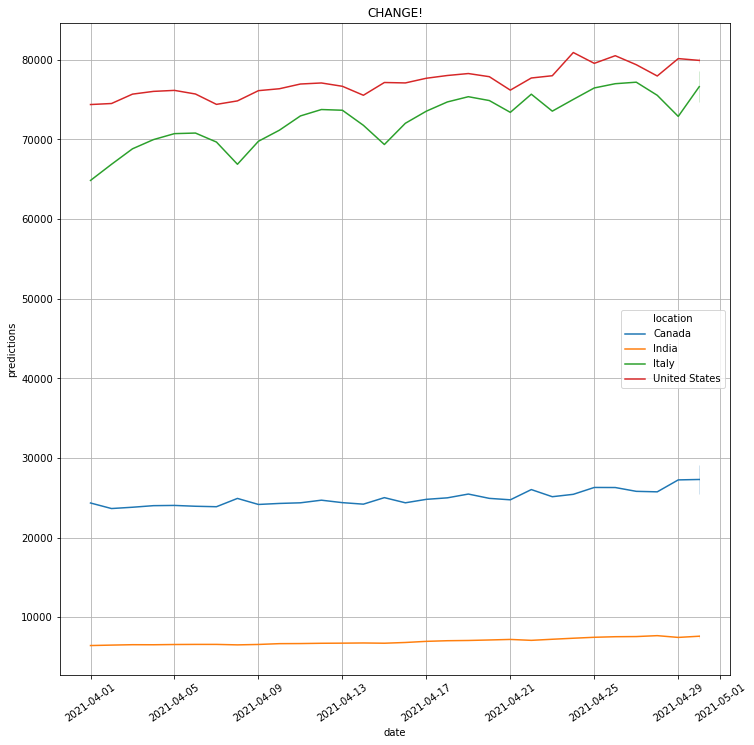

In [685]:
#Sets figure size
plt.figure(figsize=(12,12))
#rotates the x axis
plt.xticks(rotation=35)
#ensures grid lines are on the image
plt.grid(b=True,which='major')
chartPollution = sns.lineplot(data=MarchCovidData, x="date", y="predictions", hue="location").set_title("CHANGE!")
chartPollution.figure.canvas.draw()


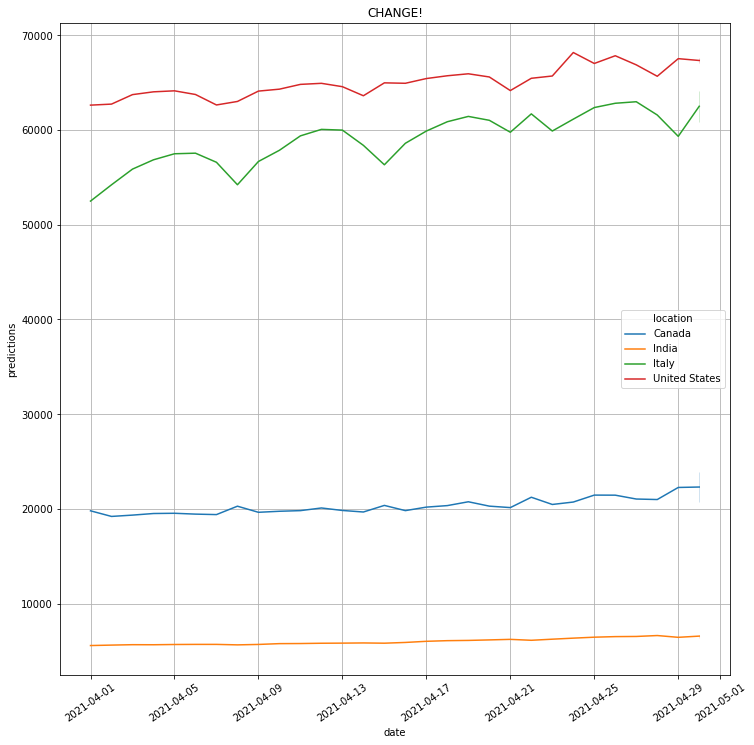

In [686]:
##### DECREASE

MarchCovidData["total_deaths_per_million"] = MarchCovidData['total_deaths_per_million'] - (MarchCovidData['total_deaths_per_million'] * .15)
MarchCovidData["new_cases_per_million"] = MarchCovidData['new_cases_per_million'] - (MarchCovidData['new_cases_per_million'] * .15)
#MarchCovidData["date"] = MarchCovidData["date"] + DateOffset(months=1)

MarchCovidData["predictions"] = MarchCovidData[featureColumns].apply(
    lambda s: model.predict(s.values[None])[0], axis=1
)
plt.figure(figsize=(12,12))
#rotates the x axis
plt.xticks(rotation=35)
#ensures grid lines are on the image
plt.grid(b=True,which='major')
chartPollution = sns.lineplot(data=MarchCovidData, x="date", y="predictions", hue="location").set_title("CHANGE!")
chartPollution.figure.canvas.draw()